Data Science Workshop at US-Korea Conference 2021, December 15, 2021, 2-5pm PDT


## Session 3: Special Topic Overview
# *Introduction to Natural Language Processing (NLP)*

### Instructor and Code Author: Amy Han
### Edited by: Sam Lim

Resources:

https://www.kaggle.com/septa97/100k-courseras-course-reviews-dataset/code

https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6 

https://www.kaggle.com/bezrukov/coursera-analysis-of-ratings-and-reviews 

https://medium.com/@ethannam/understanding-the-levenshtein-distance-equation-for-beginners-c4285a5604f0 




### **Pre-Exercise 1:** Save a Copy
Make a copy of this notebook to your own local drive from the menu at top:
* Click "Copy to Drive" button or
* Click "File" -> "Save a copy in Drive"
* Verify new file name at top begins with "Copy of "

To test if you made a copy successfully run the code below.

If you get a warning that says "**Warning: This notebook was not authored by Google.**" then you did not successfully save a copy. Click Cancel and try again.

In [1]:
print('Hello World')

Hello World


* If successful, you may close the other tab with the master copy file.

>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (1 min).

---

## A. What Are Packages?



- **pandas** is a package in Python that helps to handle lots of data. It helps to sort and clean the data. Some highlights:

 - Easy handling of *missing data* (represented as NaN) in floating point as well as non-floating point data
 - Size mutability: columns can be *inserted and deleted* from DataFrame and higher dimensional objects
 - Intelligent *label-based slicing*, *fancy indexing*, and *subsetting* of large data sets
 - Intuitive *merging* and *joining* data sets
 - Flexible *reshaping* and *pivoting* of data sets
- **numpy** is a package that defines a multi-dimensional array object.
- **matplotlib** produces quality 2D graphics
- **seaborn** is a library for making statistical graphics

Let's import or include some libraries

In [41]:
!pip install pyyaml==5.4.1

import pandas as pd # the pd is by convention
import numpy as np # as is the np

import matplotlib.pyplot as plt
import seaborn as sns
# To Plot matplotlib figures inline on the notebook
%matplotlib inline
pd.set_option("max_rows", 20)
pd.set_option('max_columns', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 11.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


Let's get started with a sample data.

---

## B. Reading Data

Data Description:

Author webscrapped the website of Coursera and pre-labelled the data set depending on the rating (5 star rating, the review was labelled as Very positive, positive for , Neutral for 3, Negative for 2, and very Negative for 1 star rating). 

Data obtained from kaggle: https://www.kaggle.com/roshansharma/coursera-course-reviews/data


**reviews_by_course.csv**

CourseId - The course tag. This is in the URL of the course in the Coursera website. For example, in this URL, machine-learning would be the course tag.

Review - A review in a specific course.

Label - The rating of the course review.

##### To begin with, we're now going to read this data from the CSV file into our Python notebook to work with

In [3]:
import pandas as pd
url="https://raw.githubusercontent.com/ahan02/DSW_UKC_2021/main/data/reviews_by_course.csv"
reviews_by_course = pd.read_csv(url)

In [4]:
reviews_by_course.head()

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


In [5]:
reviews_by_course.shape

(140320, 3)

In [6]:
reviews_by_course.columns

Index(['CourseId', 'Review', 'Label'], dtype='object')

Let's explore reviews by course title

In [7]:
reviews_by_course = reviews_by_course.dropna(subset=['Review'])

In [8]:
#distribution by labels
reviews_by_course['Label'].value_counts()
rating_counts = pd.DataFrame(reviews_by_course['Label'].value_counts()).reset_index()
rating_counts.columns = ['Label', 'Ratings']
rating_counts

,Label,Ratings
0,5,106514
1,4,22460
2,3,5923
3,1,2866
4,2,2554


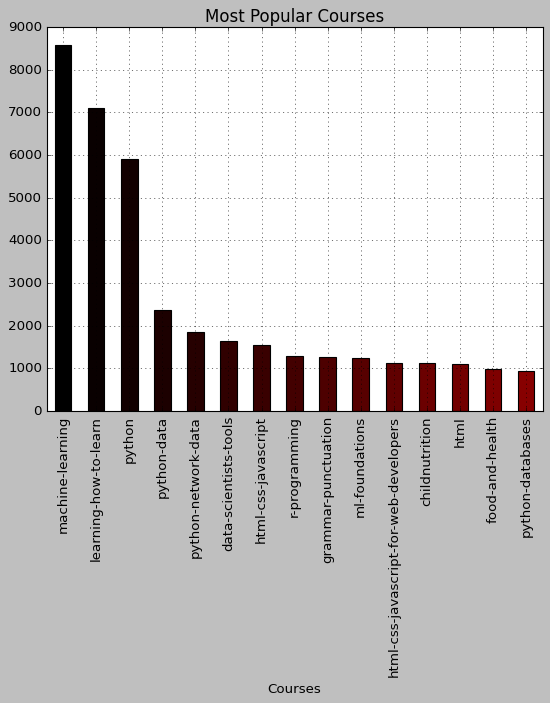

In [9]:
#distribution by top 15 popular courses
plt.rcParams['figure.figsize'] = (18, 8)
#['default','fivethirtyeight','seaborn', 'Solarize_Light2','classic'] 
plt.style.use('classic')
#https://www.kite.com/python/docs/matplotlib.pyplot.colormaps
color = plt.cm.gist_heat(np.linspace(0, 2, 80))
reviews_by_course["CourseId"].value_counts().head(15).plot.bar(color = color)
plt.title('Most Popular Courses', fontsize = 15, fontweight = 25)
plt.xlabel('Courses')
plt.grid()
plt.show()

In [10]:
# average rating of the course
average_rating = reviews_by_course.groupby("CourseId").mean().sort_values("Label", ascending=False)
total_num_reviews = reviews_by_course["CourseId"].value_counts()
df_total_num_reviews = pd.DataFrame(total_num_reviews)
# merge df_reviews_number and average_rating
analysis = pd.merge(df_total_num_reviews, average_rating,  right_index=True, left_index=True)
# rename columns
analysis.columns = ["total number of reviews", "average_rating"]
# show first 15 rows
analysis.head(15)

,total number of reviews,average_rating
machine-learning,8570,4.899067
learning-how-to-learn,7090,4.858392
python,5906,4.778869
python-data,2372,4.836425
python-network-data,1844,4.767896
data-scientists-tools,1637,4.269395
html-css-javascript,1544,4.700130
r-programming,1292,4.251548
grammar-punctuation,1267,4.680347
ml-foundations,1247,4.509222


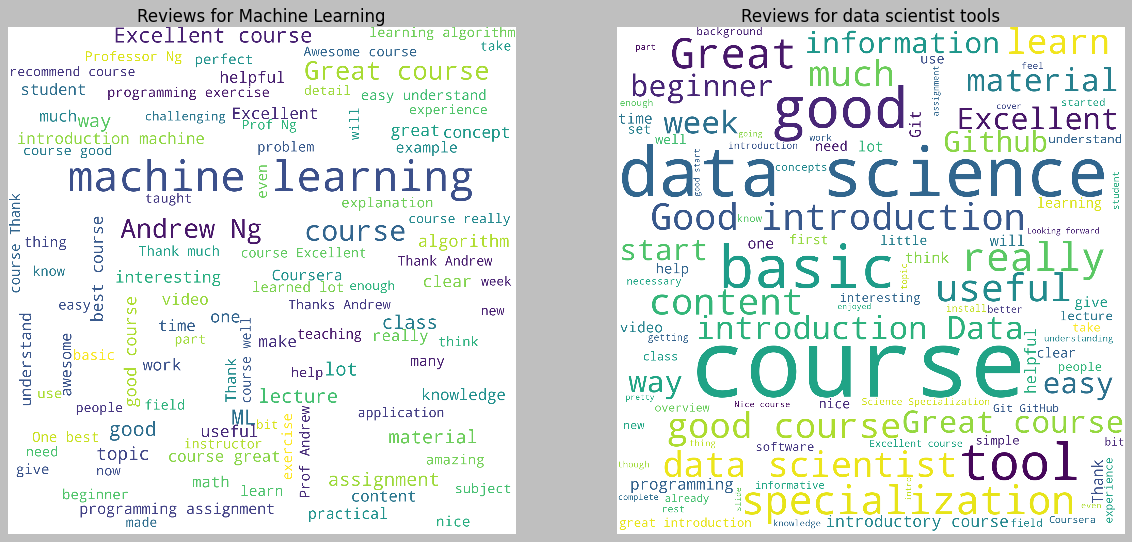

In [11]:
# let's check review for machine learning and data science

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

mlreview = ' '.join([text for text in reviews_by_course['Review'][reviews_by_course['CourseId'] == 'machine-learning']])
plt.rcParams['figure.figsize'] = (18, 18)

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 100).generate(mlreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Machine Learning', fontsize = 15)

dsreview = ' '.join([text for text in reviews_by_course['Review'][reviews_by_course['CourseId'] == 'data-scientists-tools']])

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 100).generate(dsreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for data scientist tools', fontsize = 15)

plt.show()

# C. Exercise 1
Let's draw another word cloud for Course id= 'python'

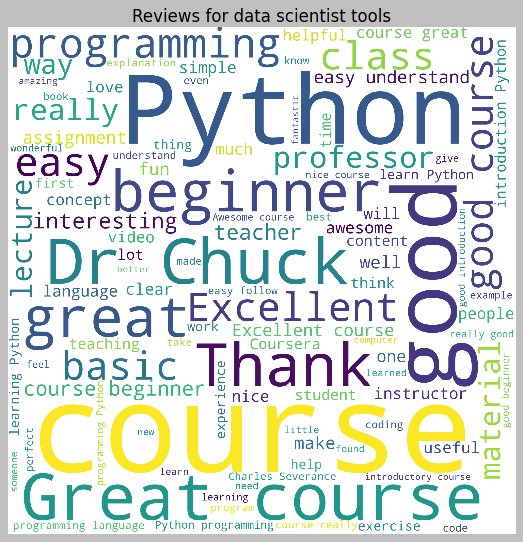

In [12]:
dsreview = ' '.join([text for text in reviews_by_course['Review'][reviews_by_course['CourseId'] == 'python']])

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 100).generate(dsreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for data scientist tools', fontsize = 15)

plt.show()

>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (2 min).

---

# D. Cleansing data

Let's drop some null reviews and cleansing reviews

In [13]:
reviews_by_course = reviews_by_course.dropna(subset=['Review'])

Then remove some punctuation

In [14]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

reviews_by_course['Review_cleaned'] = reviews_by_course['Review'].apply(lambda x: remove_punct(x))
reviews_by_course.head(10)

,CourseId,Review,Label,Review_cleaned
0,2-speed-it,BOring,1,BOring
1,2-speed-it,Bravo !,5,Bravo
2,2-speed-it,Very goo,5,Very goo
3,2-speed-it,"Great course - I recommend it for all, especia...",5,Great course I recommend it for all especiall...
4,2-speed-it,One of the most useful course on IT Management!,5,One of the most useful course on IT Management
5,2-speed-it,I was disappointed because the name is mislead...,3,I was disappointed because the name is mislead...
6,2-speed-it,Super content. I'll definitely re-do the course,5,Super content Ill definitely redo the course
7,2-speed-it,Etant contrôleur de gestion pour le départemen...,5,Etant contrôleur de gestion pour le départemen...
8,2-speed-it,One of the excellent courses at Coursera for i...,5,One of the excellent courses at Coursera for i...
9,2-speed-it,Is there any reason why you should not apply t...,5,Is there any reason why you should not apply t...


Then we will further cleanse the data by removing stopwords

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews_by_course['Review_cleaned_without_stopwords'] = reviews_by_course['Review_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
reviews_by_course.head(10)

,CourseId,Review,Label,Review_cleaned,Review_cleaned_without_stopwords
0,2-speed-it,BOring,1,BOring,BOring
1,2-speed-it,Bravo !,5,Bravo,Bravo
2,2-speed-it,Very goo,5,Very goo,Very goo
3,2-speed-it,"Great course - I recommend it for all, especia...",5,Great course I recommend it for all especiall...,Great course I recommend especially IT Busines...
4,2-speed-it,One of the most useful course on IT Management!,5,One of the most useful course on IT Management,One useful course IT Management
5,2-speed-it,I was disappointed because the name is mislead...,3,I was disappointed because the name is mislead...,I disappointed name misleading The course prov...
6,2-speed-it,Super content. I'll definitely re-do the course,5,Super content Ill definitely redo the course,Super content Ill definitely redo course
7,2-speed-it,Etant contrôleur de gestion pour le départemen...,5,Etant contrôleur de gestion pour le départemen...,Etant contrôleur de gestion pour le départemen...
8,2-speed-it,One of the excellent courses at Coursera for i...,5,One of the excellent courses at Coursera for i...,One excellent courses Coursera information tec...
9,2-speed-it,Is there any reason why you should not apply t...,5,Is there any reason why you should not apply t...,Is reason apply course BCGIts content pretty u...


---

# E. Build Recommendation

Let's subset new data called popoular courses that has more than 1,000 reviews

In [18]:
Popular_courses=reviews_by_course[reviews_by_course["CourseId"].map(reviews_by_course["CourseId"].value_counts())>1000]
Popular_courses.head()

,CourseId,Review,Label,Review_cleaned,Review_cleaned_without_stopwords
15301,childnutrition,Amazing course. It taught me how to balance my...,5,Amazing course It taught me how to balance my ...,Amazing course It taught balance daily diets
15302,childnutrition,exelente aprendizaje,5,exelente aprendizaje,exelente aprendizaje
15303,childnutrition,I thoroughly enjoyed this course! As a profess...,5,I thoroughly enjoyed this course As a professi...,I thoroughly enjoyed course As professional co...
15304,childnutrition,excelent!,5,excelent,excelent
15305,childnutrition,Very useful and encourage me to cook healthy f...,5,Very useful and encourage me to cook healthy f...,Very useful encourage cook healthy food notice...


In [19]:
Popular_courses.CourseId.unique()

array(['childnutrition', 'data-scientists-tools', 'grammar-punctuation',
       'html', 'html-css-javascript',
       'html-css-javascript-for-web-developers', 'learning-how-to-learn',
       'machine-learning', 'ml-foundations', 'python', 'python-data',
       'python-network-data', 'r-programming'], dtype=object)

In [20]:
Popular_courses.shape

(36108, 5)

Then, We will install packages

**Import some libraries** 
#### Fuzzy string matching uses Levenshtein Distance to calculate the differences between sequences in a simple-to-use package.


> From fuzzy documentation: https://pypi.org/project/fuzzywuzzy/

#### python-Levenshtein is a python extension for computing string edit distances and similarities.


> From python-Levenshtein: https://pypi.org/project/python-Levenshtein/


Resource: https://medium.com/analytics-vidhya/fuzzy-matching-in-python-2def168dee4a


In [21]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.7 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149867 sha256=a6b2fc7dbd19b18ede536f577492403ac85e7930d49568bcd0ab4f180cdd3bb0
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


The concept of Levenshtein Distance sometimes also called as Minimum Edit distance, it is a popular metric for measuring the distance between two strings. It is calculated by counting number of edits required to transform one string into another. 

Mathematical formula behind the calculation goes by something like this.


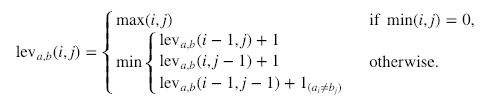

Build recommendation that will return top 3 relateds coures from on user's input based on title similarities. 

We will use process.ExtractBest function from FuzzyWuzzy..

https://www.kite.com/python/docs/fuzzywuzzy.process

In [23]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def course_recommend(desired_course):
    
    try:
        if desired_course is '' :
            print("Show the list of courses available:")
            print(list(Popular_courses.CourseId.unique()))
        
        else:
            query = desired_course
            options = list(Popular_courses.CourseId.unique())
            result = process.extractBests(query, options, limit=3)
            df=pd.DataFrame(result, columns=["recommended courses", "Similarity score"])
            print(df)

          

    except TypeError:
        print("Please type again")

In [24]:
course_recommend('')

Show the list of courses available:
['childnutrition', 'data-scientists-tools', 'grammar-punctuation', 'html', 'html-css-javascript', 'html-css-javascript-for-web-developers', 'learning-how-to-learn', 'machine-learning', 'ml-foundations', 'python', 'python-data', 'python-network-data', 'r-programming']


In [25]:
course_recommend('data science')

     recommended courses  Similarity score
0  data-scientists-tools                86
1    python-network-data                86
2            python-data                50


In [26]:
course_recommend('python')

   recommended courses  Similarity score
0               python               100
1          python-data                90
2  python-network-data                90


>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (1 min).

---

# F. Sentiment Analysis

Sentiment analysis is the use of natural language processing to try to identify, extract, and study subjective information. It is often used to support customer support via reviews and survey responses. 

#### Let's install Huggingface Transformers library
Reference: https://github.com/huggingface/transformers

Resource: https://towardsdatascience.com/sentiment-analysis-with-pretrained-transformers-using-pytorch-420bbc1a48cd

https://huggingface.co/transformers/main_classes/pipelines.html



Transformers provides thousands of pretrained models to perform tasks on texts such as classification, information extraction, question answering, summarization, translation, text generation and more in over 100 languages. 

It provides APIs to quickly download and use those pretrained models on a given text, fine-tune them on your own datasets and then share them with the community on our model hub. 

In [27]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 13.1 MB/s 
     |████████████████████████████████| 6.6 MB 42.9 MB/s 
     |████████████████████████████████| 101 kB 12.0 MB/s 
     |████████████████████████████████| 596 kB 68.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Instead of importing the entire library, there is a pipeline module within the library that provides a simple API to perform various NLP tasks 

In [28]:
from transformers import pipeline

Then, we can start building the sentiment analysis model and tokenizer using the module. To build it, we can do

In [29]:
sentiment_analysis = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [30]:
pos_text = "I like data science workshop at ukc"
neg_text = "I don't like data science workshop at ukc"

In [31]:
result = sentiment_analysis(pos_text)[0]
print("Label:", result['label'])
print("Confidence Score:", result['score'])
print()
result = sentiment_analysis(neg_text)[0]
print("Label:", result['label'])
print("Confidence Score:", result['score'])

Label: POSITIVE
Confidence Score: 0.9914463758468628

Label: NEGATIVE
Confidence Score: 0.9935709238052368


We can see that the model correctly predicts the two texts into their sentiments, with high confidence score

Let's try to use this model to our sample data

In [32]:
reviews_by_course.head(10)

,CourseId,Review,Label,Review_cleaned,Review_cleaned_without_stopwords
0,2-speed-it,BOring,1,BOring,BOring
1,2-speed-it,Bravo !,5,Bravo,Bravo
2,2-speed-it,Very goo,5,Very goo,Very goo
3,2-speed-it,"Great course - I recommend it for all, especia...",5,Great course I recommend it for all especiall...,Great course I recommend especially IT Busines...
4,2-speed-it,One of the most useful course on IT Management!,5,One of the most useful course on IT Management,One useful course IT Management
5,2-speed-it,I was disappointed because the name is mislead...,3,I was disappointed because the name is mislead...,I disappointed name misleading The course prov...
6,2-speed-it,Super content. I'll definitely re-do the course,5,Super content Ill definitely redo the course,Super content Ill definitely redo course
7,2-speed-it,Etant contrôleur de gestion pour le départemen...,5,Etant contrôleur de gestion pour le départemen...,Etant contrôleur de gestion pour le départemen...
8,2-speed-it,One of the excellent courses at Coursera for i...,5,One of the excellent courses at Coursera for i...,One excellent courses Coursera information tec...
9,2-speed-it,Is there any reason why you should not apply t...,5,Is there any reason why you should not apply t...,Is reason apply course BCGIts content pretty u...


In [33]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
reviews_by_course = reviews_by_course[reviews_by_course['Label'] != 3]
reviews_by_course['sentiment'] = reviews_by_course['Label'].apply(lambda rating : +1 if rating > 3 else -1)
reviews_by_course.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,CourseId,Review,Label,Review_cleaned,Review_cleaned_without_stopwords,sentiment
0,2-speed-it,BOring,1,BOring,BOring,-1
1,2-speed-it,Bravo !,5,Bravo,Bravo,1
2,2-speed-it,Very goo,5,Very goo,Very goo,1
3,2-speed-it,"Great course - I recommend it for all, especia...",5,Great course I recommend it for all especiall...,Great course I recommend especially IT Busines...,1
4,2-speed-it,One of the most useful course on IT Management!,5,One of the most useful course on IT Management,One useful course IT Management,1
6,2-speed-it,Super content. I'll definitely re-do the course,5,Super content Ill definitely redo the course,Super content Ill definitely redo course,1
7,2-speed-it,Etant contrôleur de gestion pour le départemen...,5,Etant contrôleur de gestion pour le départemen...,Etant contrôleur de gestion pour le départemen...,1
8,2-speed-it,One of the excellent courses at Coursera for i...,5,One of the excellent courses at Coursera for i...,One excellent courses Coursera information tec...,1
9,2-speed-it,Is there any reason why you should not apply t...,5,Is there any reason why you should not apply t...,Is reason apply course BCGIts content pretty u...,1
10,2-speed-it,Excellent course and teachers. Congratulations!!,5,Excellent course and teachers Congratulations,Excellent course teachers Congratulations,1


In [34]:
# split df - positive and negative sentiment:
positive = reviews_by_course[reviews_by_course['sentiment'] == 1]
negative = reviews_by_course[reviews_by_course['sentiment'] == -1]

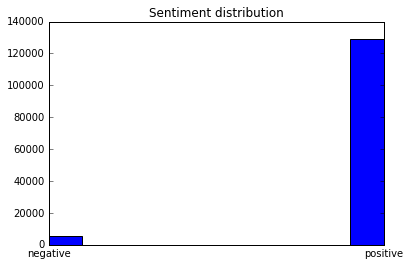

In [65]:
#https://matplotlib.org/stable/tutorials/colors/colors.html
from matplotlib import pyplot as plt

reviews_by_course['sentiment'] = reviews_by_course['sentiment'].replace({-1 : 'negative'})
reviews_by_course['sentiment'] = reviews_by_course['sentiment'].replace({1 : 'positive'})
fig = plt.hist(reviews_by_course['sentiment'].values)
# fig.update_traces(marker_color="mediumseagreen",marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5)
plt.title('Sentiment distribution')
plt.show()

In [43]:
negative.head()

,CourseId,Review,Label,Review_cleaned,Review_cleaned_without_stopwords,sentiment
0,2-speed-it,BOring,1,BOring,BOring,-1
18,2-speed-it,This course does not say anything about digiti...,2,This course does not say anything about digiti...,This course say anything digitization core sub...,-1
34,2d-cad,一开始无法上传自己的作业，后来无法审核同学的作业，到现在课程超期无法学习下一门课程，对课程作...,1,一开始无法上传自己的作业，后来无法审核同学的作业，到现在课程超期无法学习下一门课程，对课程作...,一开始无法上传自己的作业，后来无法审核同学的作业，到现在课程超期无法学习下一门课程，对课程作...,-1
94,3d-printing-applications,This course doesn't contain any new informatio...,1,This course doesnt contain any new information...,This course doesnt contain new information It ...,-1
117,3d-printing-applications,"While there is some interesting content, parti...",2,While there is some interesting content partic...,While interesting content particuarly last wee...,-1


In [44]:
negative.shape

(5420, 6)

In [45]:
negative['CourseId'].value_counts()

r-programming                134
data-scientists-tools        113
analytics-excel              104
swift-programming             91
statistical-inference         66
                            ... 
gamedev-platforms              1
principles-of-computing-1      1
games                          1
gastronomy                     1
zika                           1
Name: CourseId, Length: 1023, dtype: int64

Let's select one course and their negative reviews

In [46]:
subset_courses2=negative[negative["CourseId"]=='data-scientists-tools']
subset_courses2.shape
subset_courses2.head(5)

,CourseId,Review,Label,Review_cleaned,Review_cleaned_without_stopwords,sentiment
23705,data-scientists-tools,annoying,1,annoying,annoying,-1
23706,data-scientists-tools,"Very, very, very basic intro. The entire 4 wee...",2,Very very very basic intro The entire weeks c...,Very basic intro The entire weeks could conden...,-1
23765,data-scientists-tools,i feel that the course need more explanation ....,2,i feel that the course need more explanation ...,feel course need explanation got really lost b...,-1
23769,data-scientists-tools,"Very basic course, I was able to complete the ...",2,Very basic course I was able to complete the ...,Very basic course I able complete weeks conten...,-1
23855,data-scientists-tools,"A very big difficulty for me, French people wh...",2,A very big difficulty for me French people who...,A big difficulty French people uses speak engl...,-1


Let's make the raw review column into list of reviews

In [49]:
negative_list=negative.Review.tolist()

In [51]:
negative_list[:5]

['BOring',
 'This course does not say anything about digitization which is the core subject of the digital wave.',
 '一开始无法上传自己的作业，后来无法审核同学的作业，到现在课程超期无法学习下一门课程，对课程作业审查的灵活性有非常大的意见。',
 "This course doesn't contain any new information. It does not teach you but just excitedly shows commonly known facts.There are better ways to invest your time.",
 "While there is some interesting content, particuarly in the last week on design thinking, some of the course topics don't seem to hold together well, and the videos include a lot of monotonous talking heads. While this conveys the benefit of being able to listen to some of the videos without consistently watching, the interview questions asked of speakers are sometimes printed on the screen and not asked verbally. If you're not watching, you miss the questions. I would like to see this course refocused on design thinking for 3D printing, with other applications interspersed as examples rather than constituting the lion's share of the course. I b

Let's see how our model predicts

In [56]:
results = sentiment_analysis([negative_list[0],negative_list[1], negative_list[3], negative_list[4], negative_list[5]])
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: NEGATIVE, with score: 0.9998
label: NEGATIVE, with score: 0.9995
label: POSITIVE, with score: 0.6628
label: NEGATIVE, with score: 0.998
label: NEGATIVE, with score: 0.9993


>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (1 min).

## Let's play with another sentiment analyzer

Let's install vader from NLTK package
Reference: https://www.nltk.org/howto/sentiment.html 

Resource: https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

Resource: https://medium.com/ro-codes/nlp-how-does-nltk-vader-calculate-sentiment-6c32d0f5046b


NLTK package has a VADER ( Valence Aware Dictionary for Sentiment Reasoning), a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. 

In [57]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities as sentiment scores. The sentiment score of a text is available by summing up the intensity of each word in the text. Vader’s has 7,500 sentiment features in their lexicon dictionary and if word is not available in the dictionary will be scored as “0: Neutral”.

Lexical features were rated for the polarity and intensity on a scale from “-4: Extremely Negative” to “+4 Extremely Positive” by 10 independent human raters. Then, the average score is used as the sentiment indicator for each lexical feature in the dictionary. 

Publication: https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/viewPaper/8109

Source code: https://www.nltk.org/_modules/nltk/sentiment/vader.html 


Let's use our sample data

In [66]:
reviews_by_course.head()

,CourseId,Review,Label,Review_cleaned,Review_cleaned_without_stopwords,sentiment
0,2-speed-it,BOring,1,BOring,BOring,negative
1,2-speed-it,Bravo !,5,Bravo,Bravo,positive
2,2-speed-it,Very goo,5,Very goo,Very goo,positive
3,2-speed-it,"Great course - I recommend it for all, especia...",5,Great course I recommend it for all especiall...,Great course I recommend especially IT Busines...,positive
4,2-speed-it,One of the most useful course on IT Management!,5,One of the most useful course on IT Management,One useful course IT Management,positive


Let's take a look at the first and fourth row of review dataset using vader sentiment analyzer.


Asking SentimentIntensityAnalyzer for the polarity_score gave us four values in a dictionary:


negative: the negative sentiment in a sentence

neutral: the neutral sentiment in a sentence

positive: the positive sentiment in the sentence

compound: the aggregated sentiment.

Resource: https://investigate.ai/investigating-sentiment-analysis/comparing-sentiment-analysis-tools/

In [67]:
sample = reviews_by_course["Review"][0]
sample_score = sia.polarity_scores(reviews_by_course["Review"][0])
print('{} : {}'.format(sample, sample_score))

BOring : {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3182}


In [68]:
sample = reviews_by_course["Review"][3]
sample_score = sia.polarity_scores(reviews_by_course["Review"][3])
print('{} : {}'.format(sample, sample_score))

Great course - I recommend it for all, especially IT and Business Managers! : {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.784}


Vader scans through the text for known sentimental features, modified the intensity and polarity according to the rules, summed up the scores of features found within the text and normalized the final score to (-1, 1) using function then calculate the sentimental score of the entire text.

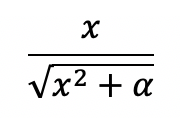


Let's get a compound score of sentiment from the cleaned review

In [69]:
reviews_by_course['sentiment_score'] = [sia.polarity_scores(x)['compound'] for x in reviews_by_course["Review_cleaned_without_stopwords"]]

Find out the governing sentiment polarity from the max score among the three polarities of sentiments

First create a list of dictionary for mapping each polarity per review

In [70]:
sentiments = [{'Negative':sia.polarity_scores(x)['neg'], 'Neutral':sia.polarity_scores(x)['neu'], 'Positive':sia.polarity_scores(x)['pos'] } for x in reviews_by_course["Review_cleaned_without_stopwords"]]

Obtain the corresponding polarity of the maximum score and add as a column in the dataset

In [71]:
reviews_by_course['sentiment_major'] = [max(x, key = x.get) for x in sentiments]

As we could see, 'sentiment' using Label is different than 'sentiment_major' sentiment categories using Vader model.

In [72]:
reviews_by_course.head(10)

,CourseId,Review,Label,Review_cleaned,Review_cleaned_without_stopwords,sentiment,sentiment_score,sentiment_major
0,2-speed-it,BOring,1,BOring,BOring,negative,-0.3182,Negative
1,2-speed-it,Bravo !,5,Bravo,Bravo,positive,0.0000,Neutral
2,2-speed-it,Very goo,5,Very goo,Very goo,positive,0.0000,Neutral
3,2-speed-it,"Great course - I recommend it for all, especia...",5,Great course I recommend it for all especiall...,Great course I recommend especially IT Busines...,positive,0.7650,Positive
4,2-speed-it,One of the most useful course on IT Management!,5,One of the most useful course on IT Management,One useful course IT Management,positive,0.4404,Neutral
6,2-speed-it,Super content. I'll definitely re-do the course,5,Super content Ill definitely redo the course,Super content Ill definitely redo course,positive,0.5859,Positive
7,2-speed-it,Etant contrôleur de gestion pour le départemen...,5,Etant contrôleur de gestion pour le départemen...,Etant contrôleur de gestion pour le départemen...,positive,0.6908,Neutral
8,2-speed-it,One of the excellent courses at Coursera for i...,5,One of the excellent courses at Coursera for i...,One excellent courses Coursera information tec...,positive,0.5719,Neutral
9,2-speed-it,Is there any reason why you should not apply t...,5,Is there any reason why you should not apply t...,Is reason apply course BCGIts content pretty u...,positive,0.4939,Neutral
10,2-speed-it,Excellent course and teachers. Congratulations!!,5,Excellent course and teachers Congratulations,Excellent course teachers Congratulations,positive,0.8225,Positive


>**Stop for Zoom Poll:** Once you have completed this step please answer the task completion poll (1 min).

---

# G. Exercise 2

##Create recommendation model for your own

Select popular courses that has more than 1500 number of reviews, and build recommendation to return top 5 similar courses, test with class title, 'java'

In [73]:
Popular_courses_subset=reviews_by_course[reviews_by_course["CourseId"].map(reviews_by_course["CourseId"].value_counts())>1500]
Popular_courses_subset.head()

,CourseId,Review,Label,Review_cleaned,Review_cleaned_without_stopwords,sentiment,sentiment_score,sentiment_major
50808,html-css-javascript,The course was comprehensive,5,The course was comprehensive,The course comprehensive,positive,0.2500,Neutral
50809,html-css-javascript,Nice course,5,Nice course,Nice course,positive,0.4215,Positive
50810,html-css-javascript,VERY GOOD,5,VERY GOOD,VERY GOOD,positive,0.4927,Positive
50811,html-css-javascript,El curso es muy completo y didactico.,5,El curso es muy completo y didactico,El curso es muy completo didactico,positive,0.0000,Neutral
50812,html-css-javascript,Very Interesting Course;The pedagogic approach...,5,Very Interesting CourseThe pedagogic approach ...,Very Interesting CourseThe pedagogic approach ...,positive,0.7089,Positive


In [74]:
Popular_courses_subset.shape

(26938, 8)

In [75]:
Popular_courses_subset.CourseId.unique()

array(['html-css-javascript', 'learning-how-to-learn', 'machine-learning',
       'python', 'python-data', 'python-network-data'], dtype=object)

In [76]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def course_recommend(desired_course):
    
    try:
        if desired_course is '' :
            print("Show the list of courses available:")
            print(list(Popular_courses.CourseId.unique()))
        
        else:
            query = desired_course
            options = list(Popular_courses.CourseId.unique())
            result = process.extractBests(query, options, limit=5)
            df=pd.DataFrame(result, columns=["recommended courses", "Similarity score"])
            print(df)

  

    except TypeError:
        print("Please type again")

In [77]:
course_recommend('')

Show the list of courses available:
['childnutrition', 'data-scientists-tools', 'grammar-punctuation', 'html', 'html-css-javascript', 'html-css-javascript-for-web-developers', 'learning-how-to-learn', 'machine-learning', 'ml-foundations', 'python', 'python-data', 'python-network-data', 'r-programming']


In [78]:
course_recommend('java')

                      recommended courses  Similarity score
0                     html-css-javascript                90
1  html-css-javascript-for-web-developers                60
2                   data-scientists-tools                45
3                     grammar-punctuation                45
4                             python-data                45
